In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
inside_index=['class1 class2 class3 class1 class2 class3'.split()]
outside_index=['school1 school1 school1 school2 school2 school2'.split()]
zip_index=list(zip(*outside_index,*inside_index))
multi_index=pd.MultiIndex.from_tuples(zip_index, names=['school','class'])
data=np.random.randint(0,100,size=(6,2))
df=pd.DataFrame(data, index=multi_index, columns=['subject1','subject2'])
df

subject1  subject2
school1 class1        39        81
        class2        68        18
        class3        17        24
school2 class1        64        26
        class2        21        44
        class3        38        72

In [40]:
df1=pd.DataFrame({"A":[1,2,3,4,5],"B":[5,4,3,2,1],
                  "C":[10,20,30,40,50],
                  "D":[50,40,30,20,10]})
df2=pd.DataFrame({"A":[9,7,6,4,4],"B":[1,4,3,6,1],
                  "C":[10,250,0,40,5],"D":[500,40,3,20,100]})
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,1,5,10,50,9,1,10,500
1,2,4,20,40,7,4,250,40
2,3,3,30,30,6,3,0,3
3,4,2,40,20,4,6,40,20
4,5,1,50,10,4,1,5,100


In [ ]:
df=pd.DataFrame({'Groups':['A','A','B','B','C','C'],
                 'Values1':[10,15,10,25,10,35]})
df['Values2']=df['Values1']*2
df.groupby('Groups').agg(('sum',np.median, 'mean'))


,Values1,Values2
Groups,,
A,25,25.0
B,35,35.0
C,45,45.0


In [36]:
df.describe().transpose()
df.groupby('Groups').mean().transpose()

Groups,A,B,C
Values1,12.5,17.5,22.5
Values2,25.0,35.0,45.0


In [43]:
dataset=sns.load_dataset('diamonds')

In [44]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [58]:
# compute median only for numeric columns to avoid errors on categorical columns
dataset.select_dtypes(include='number').median()


carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

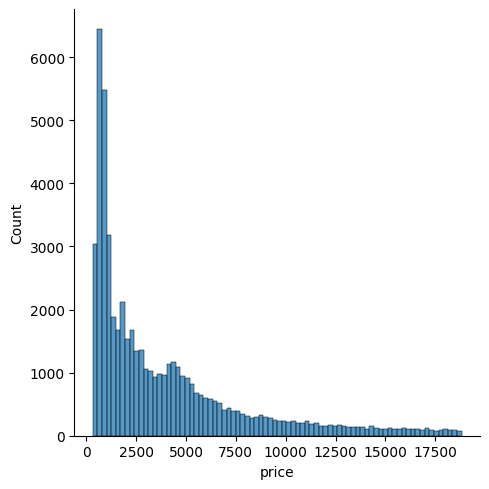

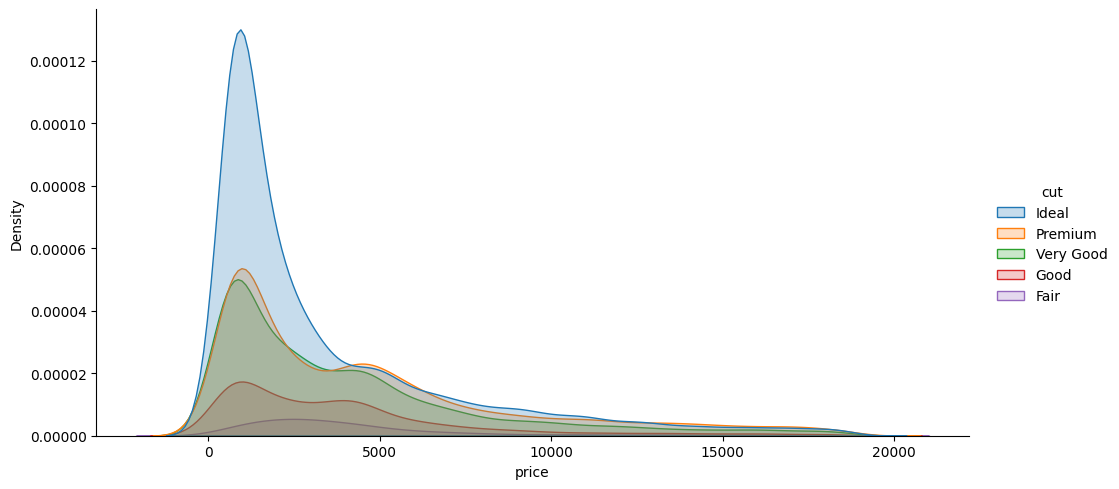

In [60]:
sns.displot(dataset['price'])
sns.displot(dataset, x='price', hue='cut', kind='kde', fill=True, height=5, aspect=2)

In [70]:
data= np.arange(441).reshape((21,21))
data

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  39,  40,  41],
       [ 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62],
       [ 63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104],
       [105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125],
       [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146],
       [147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167],
       [168, 169, 170, 1

In [31]:
df1=pd.DataFrame({"groups":['X','Y','Z','X','Y','Z'],"Val1":[1,2,3,4,5,5],"Val2":[5,4,3,2,1,9]})
df1

,groups,Val1,Val2
0,X,1,5
1,Y,2,4
2,Z,3,3
3,X,4,2
4,Y,5,1
5,Z,5,9


In [8]:
df_new=df1.select_dtypes(include='number')
df_new  

,Val1,Val2
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1
5,5,9


In [12]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())
normalize(df_new)

,Val1,Val2
0,0.00,0.500
1,0.25,0.375
2,0.50,0.250
3,0.75,0.125
4,1.00,0.000
5,1.00,1.000


In [ ]:
df_new=df_new.transform(lambda x: np.sin(x))
df_new

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2301240680.py, line 1)

In [28]:
df_new['new']=[1,2,90,1.5705,60,45]
df_new

,Val1,Val2,new
0,0.000000,0.405346,1.0000
1,0.235545,0.330362,2.0000
2,0.405346,0.235545,90.0000
3,0.503404,0.123086,1.5705
4,0.554016,0.000000,60.0000
5,0.554016,0.554016,45.0000


In [29]:
df_new=df_new.transform(np.sin)
df_new

,Val1,Val2,new
0,0.000000,0.394336,0.841471
1,0.233373,0.324385,0.909297
2,0.394336,0.233373,0.893997
3,0.482410,0.122775,1.000000
4,0.526107,0.000000,-0.304811
5,0.526107,0.526107,0.850904


In [41]:
df1.apply(np.sum)

groups    XYZXYZ
Val1          20
Val2          24
dtype: object